In [ ]:
Alunos:
GUstavo Bezerra, rm: 552076
Felipe Ferreira, rm: 553680
Gilson Dias, rm: 552345
Joseh Gabriel, rm: 553094

In [67]:
import pandas as pd
import numpy as np

file_path = './dados_youtubeTHM.csv'
df = pd.read_csv(file_path)

df.head()

,Conteúdo,Título do vídeo,Horário de publicação do vídeo,"Marcações ""Gostei""",Inscrições obtidas,Porcentagem visualizada média (%),Duração média da visualização,Visualizações,Tempo de exibição (horas),Inscritos,Impressões
0,Total,NaN,NaN,19421,5475,26.90,0:04:51,358477,29063.6171,4987,4570652
1,XE4UHson59Y,Introdução | Estatística Básica 01,"Oct 5, 2020",1268,863,29.46,0:01:47,28631,852.5966,860,93596
2,tWcwNRBpViQ,Resumo de Dados | Estatística Básica 02,"Oct 5, 2020",858,216,45.42,0:05:08,12719,1089.6826,215,101217
3,SVH0EbN3QDE,Representações Gráficas I | Estatística Básica 03,"Oct 5, 2020",654,115,46.55,0:06:04,8952,907.4947,115,96059
4,RSRGO8U6rSU,"Parâmetros, Estimadores e Estimativas | Estatí...","Sep 22, 2021",602,179,30.24,0:05:00,13047,1089.2803,177,127093


In [68]:
novos_nomes = {
    'Conteúdo':'conteudo',
    'Título do vídeo':'titulo',
    'Horário de publicação do vídeo':'data_publicacao',
    'Marcações "Gostei"':'curtidas',
    'Inscrições obtidas':'inscricoes',
    'Porcentagem visualizada média (%)':'porcent_media_visualizacao',
    'Duração média da visualização':'duracao_media_visualizacao',
    'Visualizações':'views',
    'Tempo de exibição (horas)':'tempo_exibicao_h',
    'Inscritos':'inscritos',
    'Impressões':'impressoes'
}

df=df.rename(columns=novos_nomes)

In [69]:
df.head()

,conteudo,titulo,data_publicacao,curtidas,inscricoes,porcent_media_visualizacao,duracao_media_visualizacao,views,tempo_exibicao_h,inscritos,impressoes
0,Total,NaN,NaN,19421,5475,26.90,0:04:51,358477,29063.6171,4987,4570652
1,XE4UHson59Y,Introdução | Estatística Básica 01,"Oct 5, 2020",1268,863,29.46,0:01:47,28631,852.5966,860,93596
2,tWcwNRBpViQ,Resumo de Dados | Estatística Básica 02,"Oct 5, 2020",858,216,45.42,0:05:08,12719,1089.6826,215,101217
3,SVH0EbN3QDE,Representações Gráficas I | Estatística Básica 03,"Oct 5, 2020",654,115,46.55,0:06:04,8952,907.4947,115,96059
4,RSRGO8U6rSU,"Parâmetros, Estimadores e Estimativas | Estatí...","Sep 22, 2021",602,179,30.24,0:05:00,13047,1089.2803,177,127093


In [70]:
df = df[df['titulo'].notna()]
df.head()

,conteudo,titulo,data_publicacao,curtidas,inscricoes,porcent_media_visualizacao,duracao_media_visualizacao,views,tempo_exibicao_h,inscritos,impressoes
1,XE4UHson59Y,Introdução | Estatística Básica 01,"Oct 5, 2020",1268,863,29.46,0:01:47,28631,852.5966,860,93596
2,tWcwNRBpViQ,Resumo de Dados | Estatística Básica 02,"Oct 5, 2020",858,216,45.42,0:05:08,12719,1089.6826,215,101217
3,SVH0EbN3QDE,Representações Gráficas I | Estatística Básica 03,"Oct 5, 2020",654,115,46.55,0:06:04,8952,907.4947,115,96059
4,RSRGO8U6rSU,"Parâmetros, Estimadores e Estimativas | Estatí...","Sep 22, 2021",602,179,30.24,0:05:00,13047,1089.2803,177,127093
5,uGexFqrNhw0,Introdução | Curso de Probabilidade 01,"Apr 16, 2021",584,331,17.91,0:02:23,11459,458.3918,330,47994


In [71]:
df_filtrado = df[['titulo','curtidas','inscritos','views','tempo_exibicao_h']]
df_filtrado.head()

,titulo,curtidas,inscritos,views,tempo_exibicao_h
1,Introdução | Estatística Básica 01,1268,860,28631,852.5966
2,Resumo de Dados | Estatística Básica 02,858,215,12719,1089.6826
3,Representações Gráficas I | Estatística Básica 03,654,115,8952,907.4947
4,"Parâmetros, Estimadores e Estimativas | Estatí...",602,177,13047,1089.2803
5,Introdução | Curso de Probabilidade 01,584,330,11459,458.3918


In [72]:
def amplitude(x):
    return (x.max() - x.min())

def coeficiente_variacao(x):
    return 100*(x.std() / x.mean())

def desvio_medio(x):
  return abs(x-x.mean()).mean()

def q1(x):
  return x.quantile(0.25)

def q3(x):
  return x.quantile(0.75)

result = df.aggregate({
    'curtidas': ['count', 'mean','std','min',q1,'median',q3,'max', amplitude, coeficiente_variacao,desvio_medio],
    'inscritos': ['count', 'mean', 'std', 'min',q1, 'median',q3,'max', amplitude, coeficiente_variacao,desvio_medio],
    'views': ['count', 'mean', 'std', 'min',q1,'median',q3,'max', amplitude, coeficiente_variacao,desvio_medio],
    'tempo_exibicao_h': ['count', 'mean','std', 'min',q1,'median', q3,'max', amplitude, coeficiente_variacao,desvio_medio],
})

print(result,'\n')
print('\n Resultados após arredondamento (só para exposição) \n')
result.round(0).transpose()

                         curtidas   inscritos         views  tempo_exibicao_h
count                  226.000000  226.000000    226.000000        226.000000
mean                    85.902655   16.858407   1585.977876        128.589766
std                    145.841129   65.041097   2769.370662        206.380224
min                      0.000000   -1.000000      4.000000          0.121800
q1                      11.000000    0.000000    185.250000          5.657900
median                  27.500000    3.000000    634.000000         43.101000
q3                     103.750000   12.750000   2025.250000        134.035300
max                   1268.000000  860.000000  28631.000000       1089.682600
amplitude             1268.000000  861.000000  28627.000000       1089.560800
coeficiente_variacao   169.774880  385.808082    174.615971        160.495062
desvio_medio            91.198449   21.357272   1575.553724        137.066461 


 Resultados após arredondamento (só para exposição) 



,count,mean,std,min,q1,median,q3,max,amplitude,coeficiente_variacao,desvio_medio
curtidas,226.0,86.0,146.0,0.0,11.0,28.0,104.0,1268.0,1268.0,170.0,91.0
inscritos,226.0,17.0,65.0,-1.0,0.0,3.0,13.0,860.0,861.0,386.0,21.0
views,226.0,1586.0,2769.0,4.0,185.0,634.0,2025.0,28631.0,28627.0,175.0,1576.0
tempo_exibicao_h,226.0,129.0,206.0,0.0,6.0,43.0,134.0,1090.0,1090.0,160.0,137.0


c:\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 48'. Pick better value with 'binwidth'.


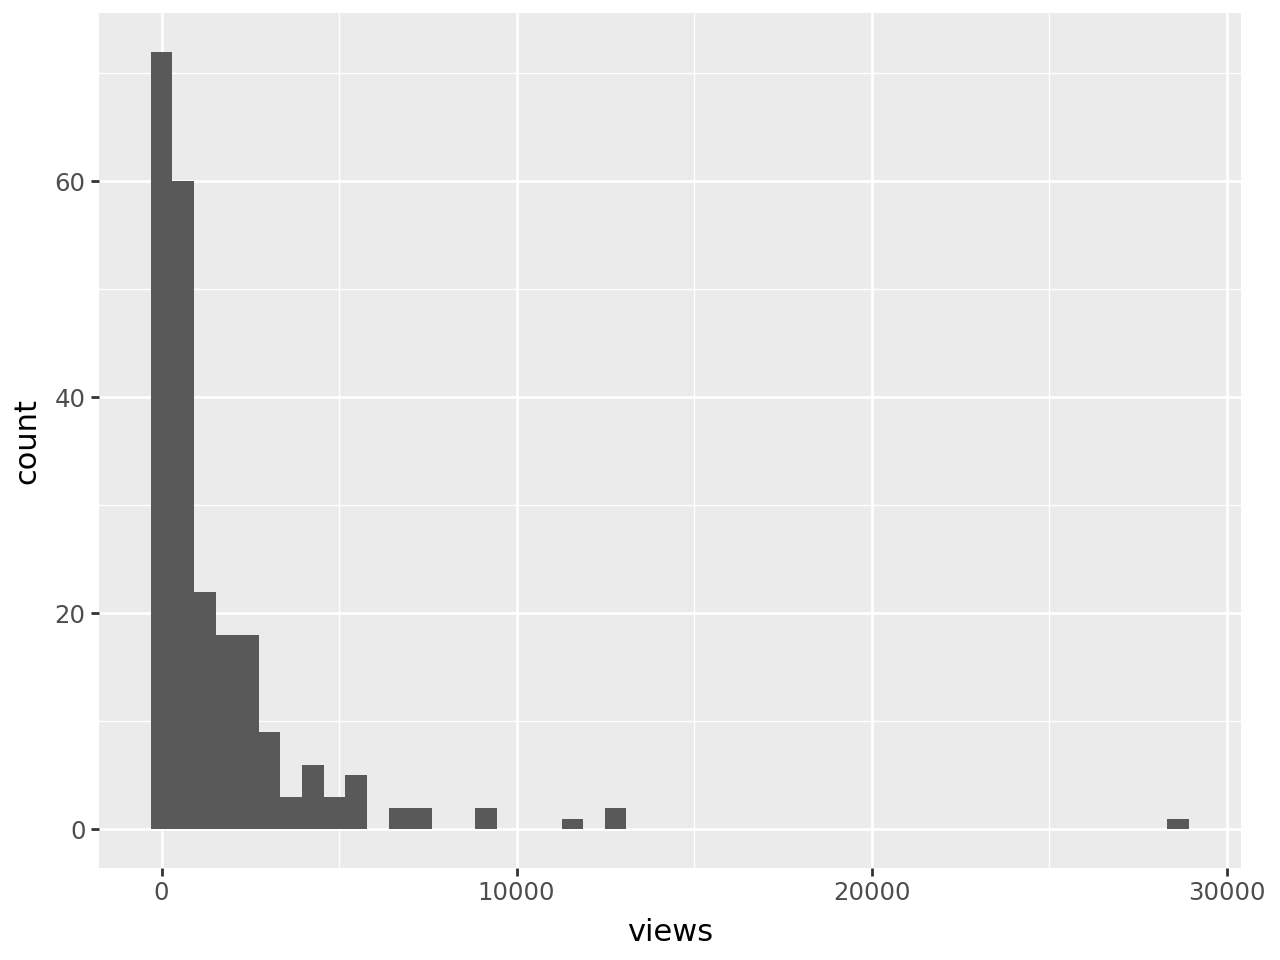

In [73]:
from plotnine import * 
ggplot(df_filtrado,aes(x='views'))+geom_histogram()


In [74]:
result[['views']].round(0).transpose()

,count,mean,std,min,q1,median,q3,max,amplitude,coeficiente_variacao,desvio_medio
views,226.0,1586.0,2769.0,4.0,185.0,634.0,2025.0,28631.0,28627.0,175.0,1576.0


c:\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 48'. Pick better value with 'binwidth'.


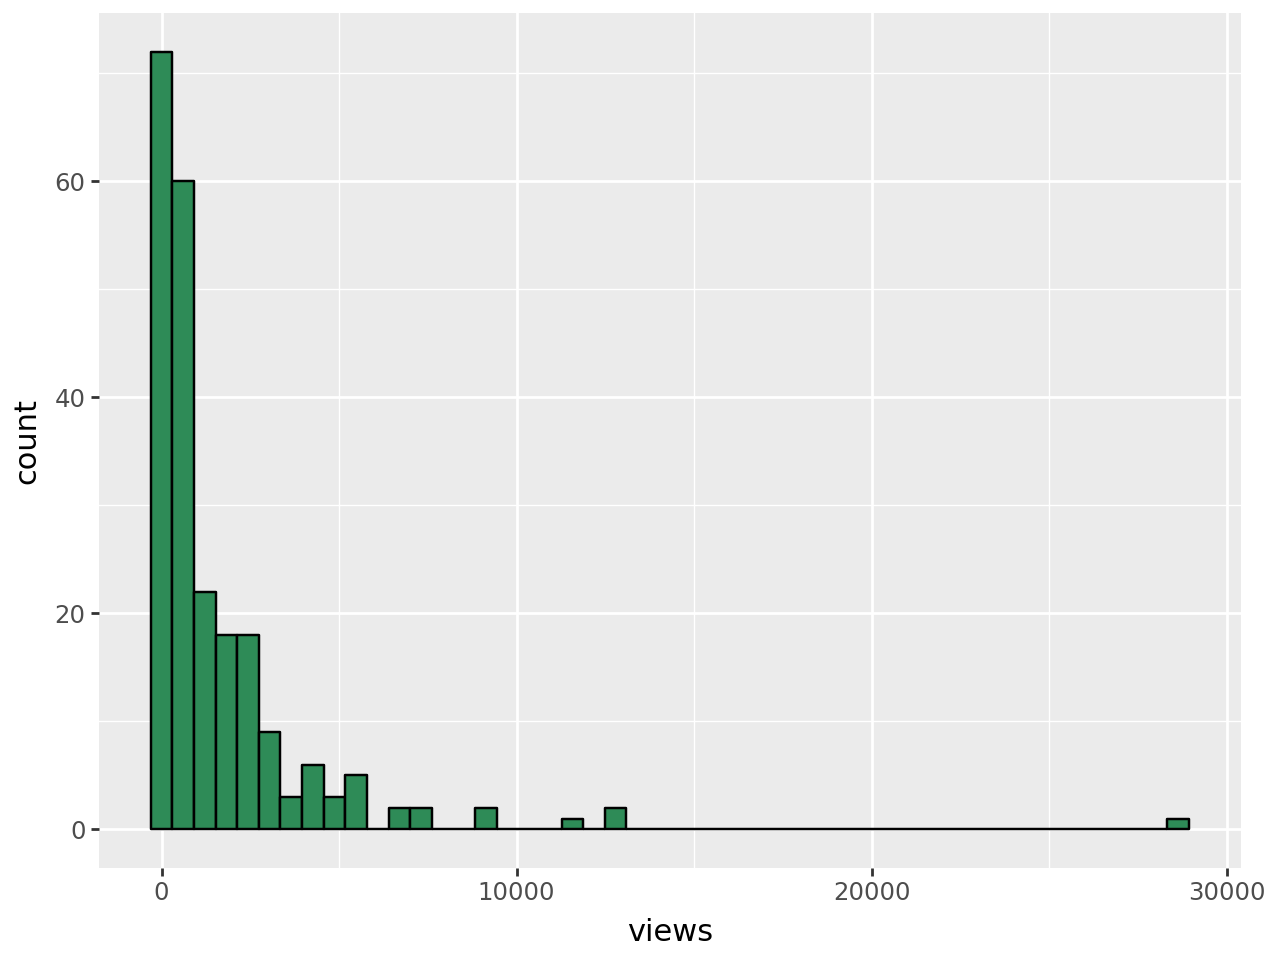

In [75]:
ggplot(df_filtrado,aes(x='views'))+geom_histogram(fill='seagreen',colour='black')

In [76]:
result[['views']].round(0).transpose()

,count,mean,std,min,q1,median,q3,max,amplitude,coeficiente_variacao,desvio_medio
views,226.0,1586.0,2769.0,4.0,185.0,634.0,2025.0,28631.0,28627.0,175.0,1576.0


c:\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 48'. Pick better value with 'binwidth'.


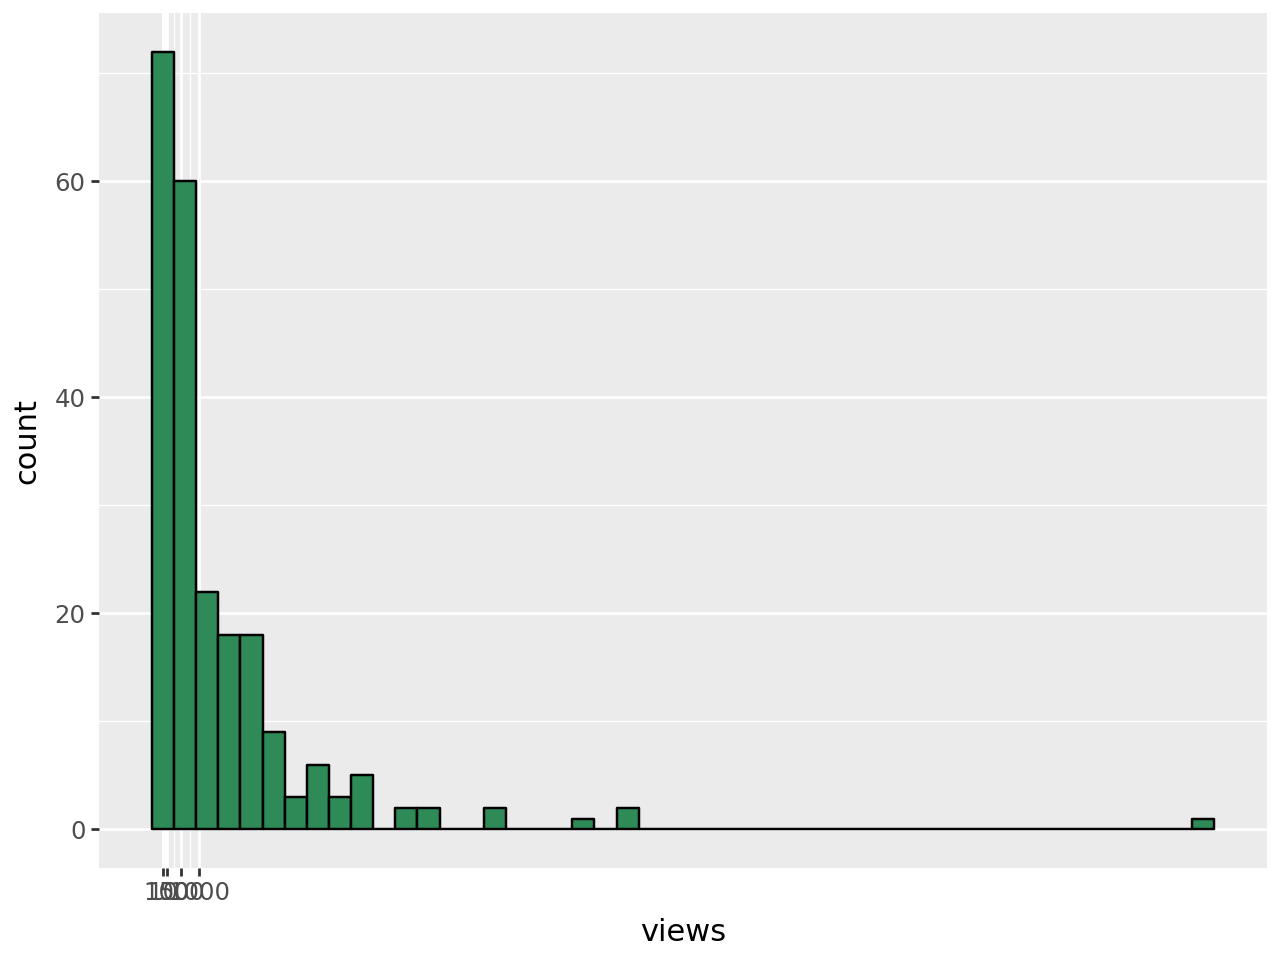

In [77]:
(ggplot(df_filtrado,aes(x='views'))+geom_histogram(fill='seagreen',colour='black')+
 scale_x_continuous(breaks=[10,100,500,1000]))

c:\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 48'. Pick better value with 'binwidth'.


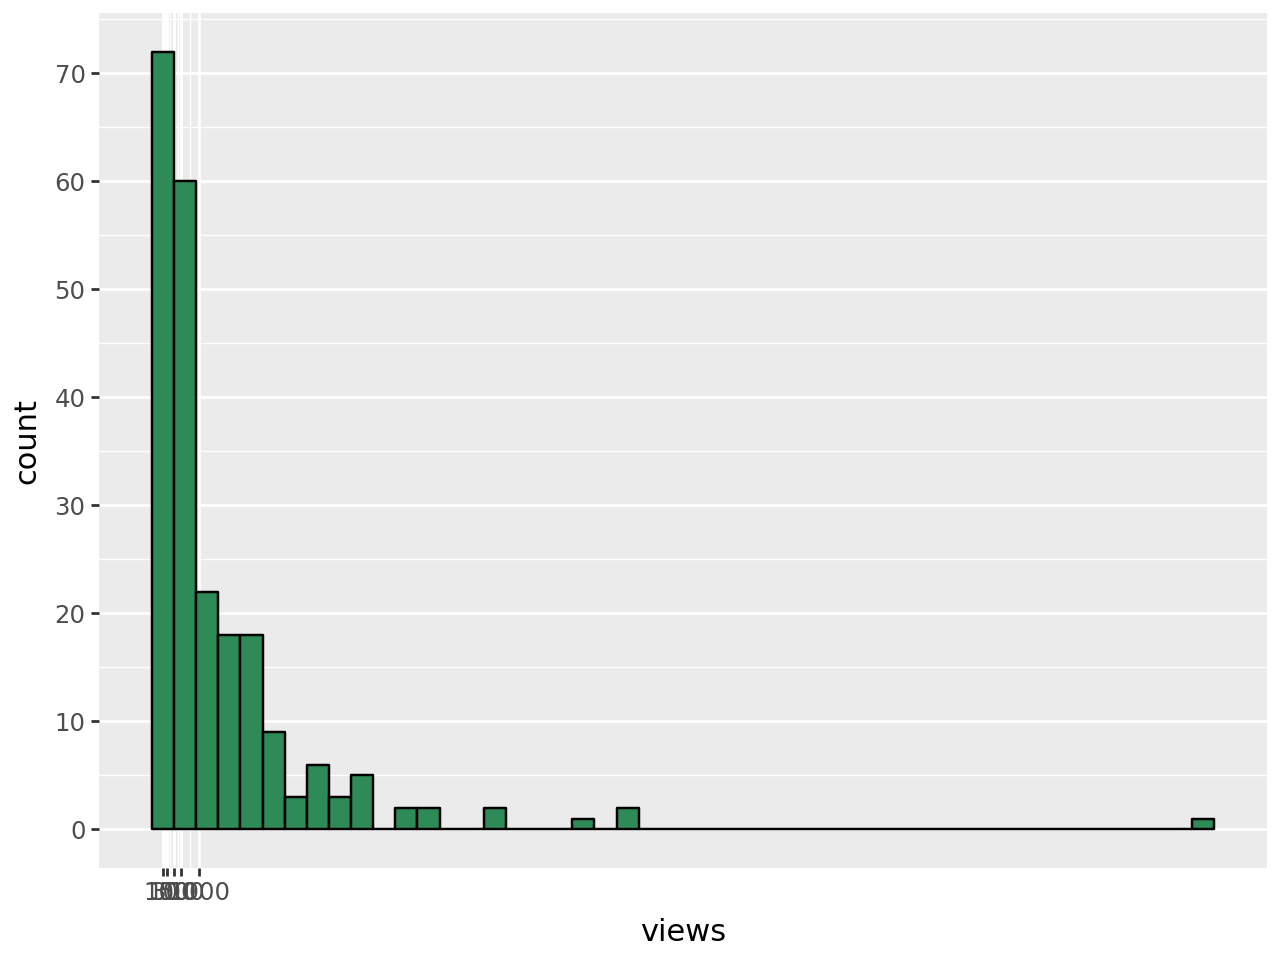

In [78]:
(ggplot(df_filtrado,aes(x='views'))+geom_histogram(fill='seagreen',colour='black')+
 scale_x_continuous(breaks=[10,100,300,500,1000])+
 scale_y_continuous(breaks=[0,10,20,30,40,50,60,70,80]))

c:\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 48'. Pick better value with 'binwidth'.


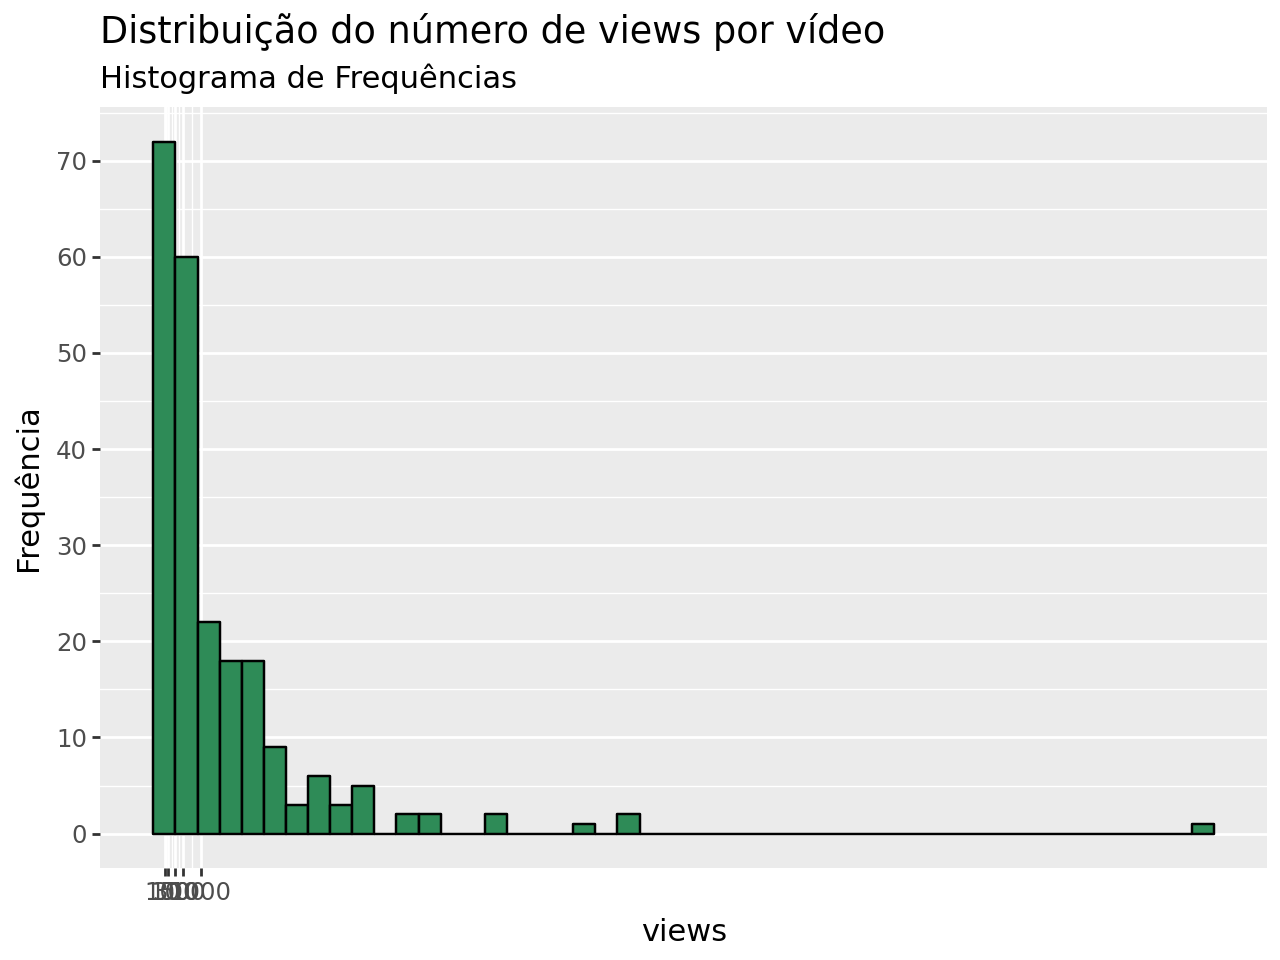

In [79]:
(ggplot(df_filtrado,aes(x='views'))+geom_histogram(fill='seagreen',colour='black')+
 scale_x_continuous(breaks=[10,100,300,500,1000])+
 scale_y_continuous(breaks=[0,10,20,30,40,50,60,70,80])+
 labs(x='views',y='Frequência',title='Distribuição do número de views por vídeo',subtitle='Histograma de Frequências')
 )

In [80]:
df_filtrado[df_filtrado['views']>=300]

,titulo,curtidas,inscritos,views,tempo_exibicao_h
1,Introdução | Estatística Básica 01,1268,860,28631,852.5966
2,Resumo de Dados | Estatística Básica 02,858,215,12719,1089.6826
3,Representações Gráficas I | Estatística Básica 03,654,115,8952,907.4947
4,"Parâmetros, Estimadores e Estimativas | Estatí...",602,177,13047,1089.2803
5,Introdução | Curso de Probabilidade 01,584,330,11459,458.3918
...,...,...,...,...,...
172,Resumo de Probabilidade 14 - Variância de uma ...,11,2,855,44.3474
178,Resumo de Probabilidade 12 - Exercício Esperan...,9,2,635,11.3018
179,Resumo de Probabilidade 21 - Distribuição de P...,8,0,541,15.6077
185,Aulão de Probabilidade Parte 2: Fuja do Nabo 0...,7,0,317,65.7326


In [81]:
def define_playlist(titulo):
  if 'Estatística' in titulo:
    return 'Estatística'
  elif 'Probabilidade' in titulo:
    return 'Probabilidade'
  else:
    return 'Outras'

df_filtrado['playlist'] = df_filtrado['titulo'].apply(define_playlist)
df_filtrado.head()

C:\Users\Platinum\AppData\Local\Temp\ipykernel_17344\4279291002.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,titulo,curtidas,inscritos,views,tempo_exibicao_h,playlist
1,Introdução | Estatística Básica 01,1268,860,28631,852.5966,Estatística
2,Resumo de Dados | Estatística Básica 02,858,215,12719,1089.6826,Estatística
3,Representações Gráficas I | Estatística Básica 03,654,115,8952,907.4947,Estatística
4,"Parâmetros, Estimadores e Estimativas | Estatí...",602,177,13047,1089.2803,Estatística
5,Introdução | Curso de Probabilidade 01,584,330,11459,458.3918,Probabilidade


In [82]:
result_playlist = df_filtrado.groupby(['playlist']).aggregate({
    'views': ['count', 'mean','std','min',q1,'median',q3,'max', amplitude, coeficiente_variacao,desvio_medio]
})

print(result_playlist,'\n')
print('\n Resultados após arredondamento (só para exposição) \n')
result_playlist.round(0)

              views                                                         \
              count         mean          std min      q1  median       q3   
playlist                                                                     
Estatística      71  2786.971831  4277.599240   4  222.00  1707.0  3978.00   
Outras           56   257.946429   317.109182   8   29.75   125.0   386.75   
Probabilidade    99  1475.868687  1554.658724  47  522.00  1041.0  1998.00   

                                                                  
                 max amplitude coeficiente_variacao desvio_medio  
playlist                                                          
Estatística    28631     28627           153.485557  2665.848443  
Outras          1733      1725           122.936062   236.934949  
Probabilidade  11459     11412           105.338553  1049.368228   


 Resultados após arredondamento (só para exposição) 



views                                                    \
              count    mean     std min     q1  median      q3    max   
playlist                                                                
Estatística      71  2787.0  4278.0   4  222.0  1707.0  3978.0  28631   
Outras           56   258.0   317.0   8   30.0   125.0   387.0   1733   
Probabilidade    99  1476.0  1555.0  47  522.0  1041.0  1998.0  11459   

                                                           
              amplitude coeficiente_variacao desvio_medio  
playlist                                                   
Estatística       28627                153.0       2666.0  
Outras             1725                123.0        237.0  
Probabilidade     11412                105.0       1049.0

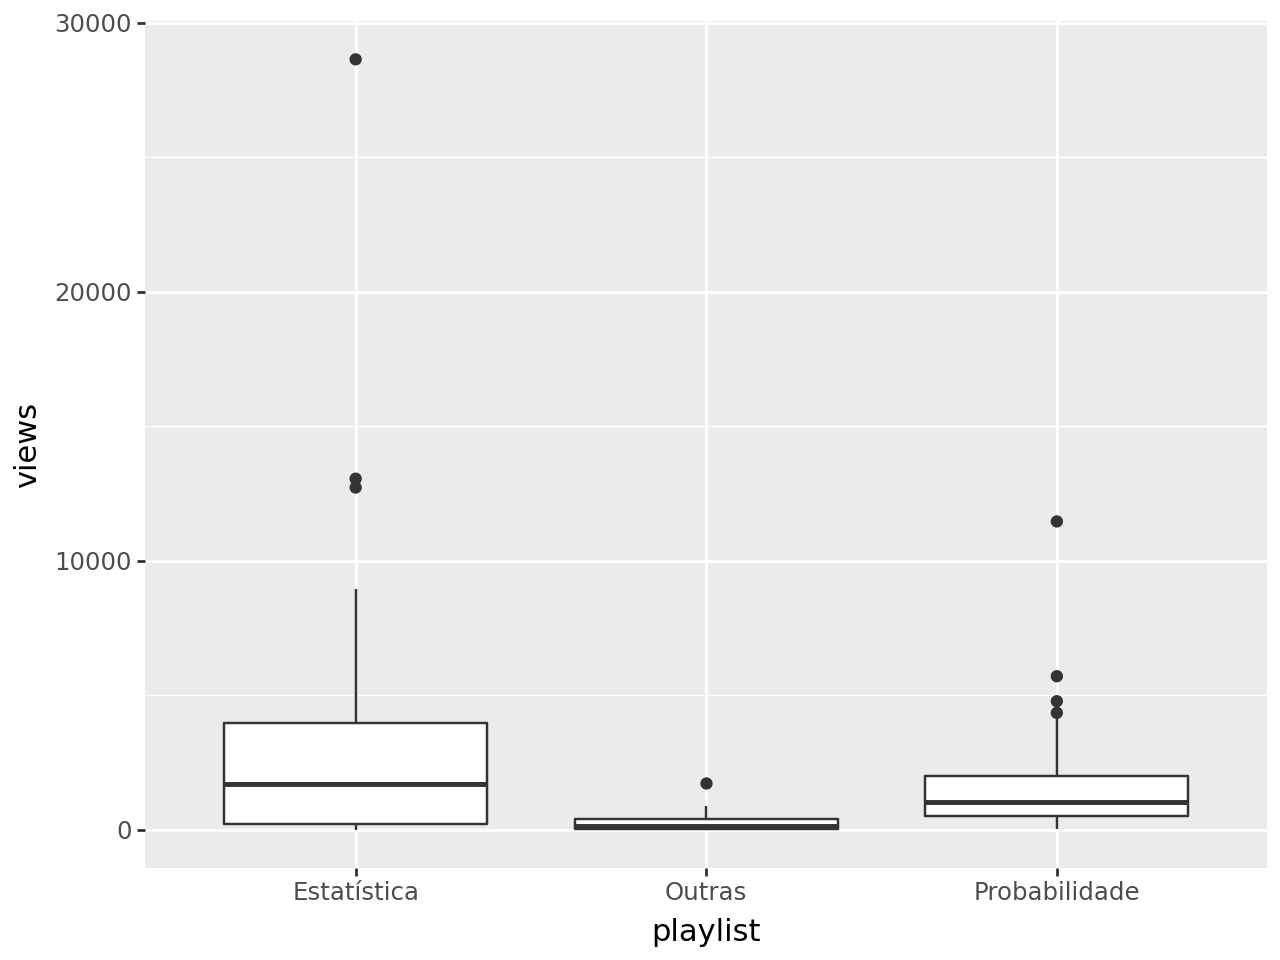

In [83]:
# Criando o boxplot (como já visto anteriormente)
(ggplot(df_filtrado,aes(x='playlist',y='views')) + geom_boxplot()
)

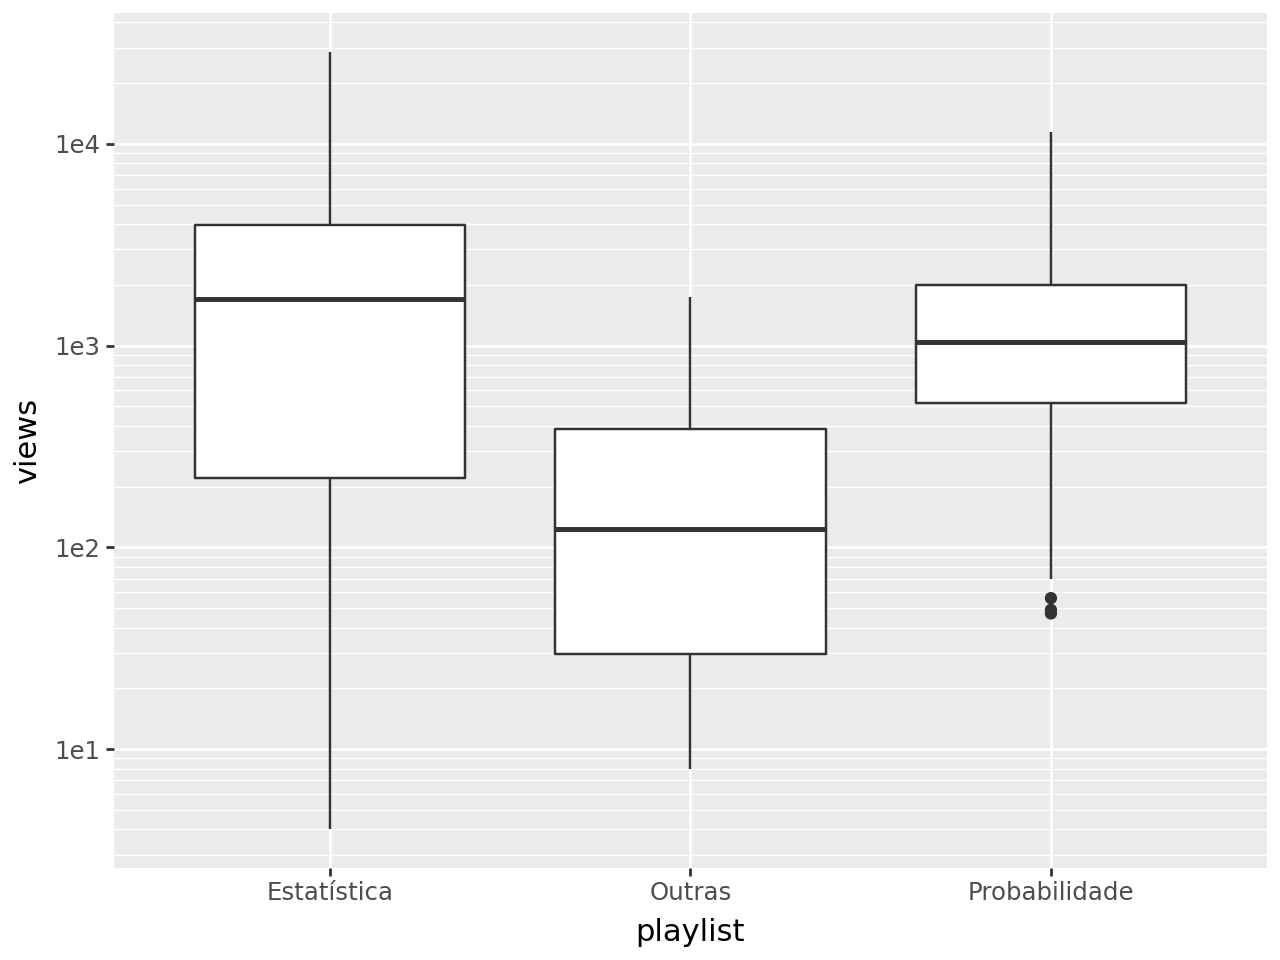

In [84]:
(ggplot(df_filtrado,aes(x='playlist',y='views'))+
 geom_boxplot()+
 scale_y_log10()
)

c:\Python312\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


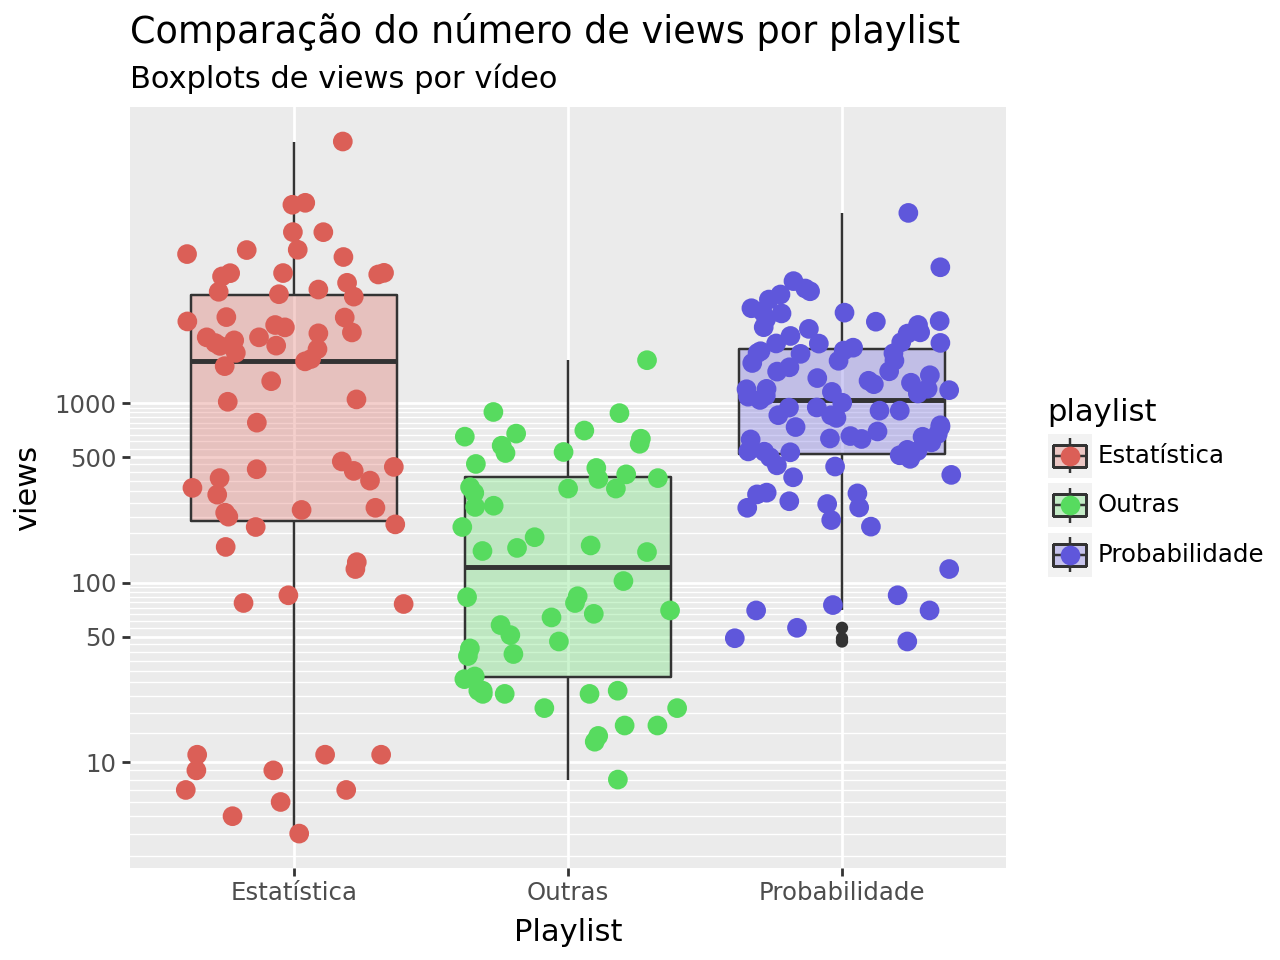

In [85]:
(ggplot(df_filtrado,aes(x='playlist',y='views'))+
 geom_boxplot(aes(fill='playlist'),alpha=0.3)+
 geom_jitter(aes(colour='playlist'),size=3)+
 scale_y_log10(breaks=[0,1,10,50,100,500,1000])+
 labs(x='Playlist',y='views',title='Comparação do número de views por playlist',subtitle='Boxplots de views por vídeo')
)

c:\Python312\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


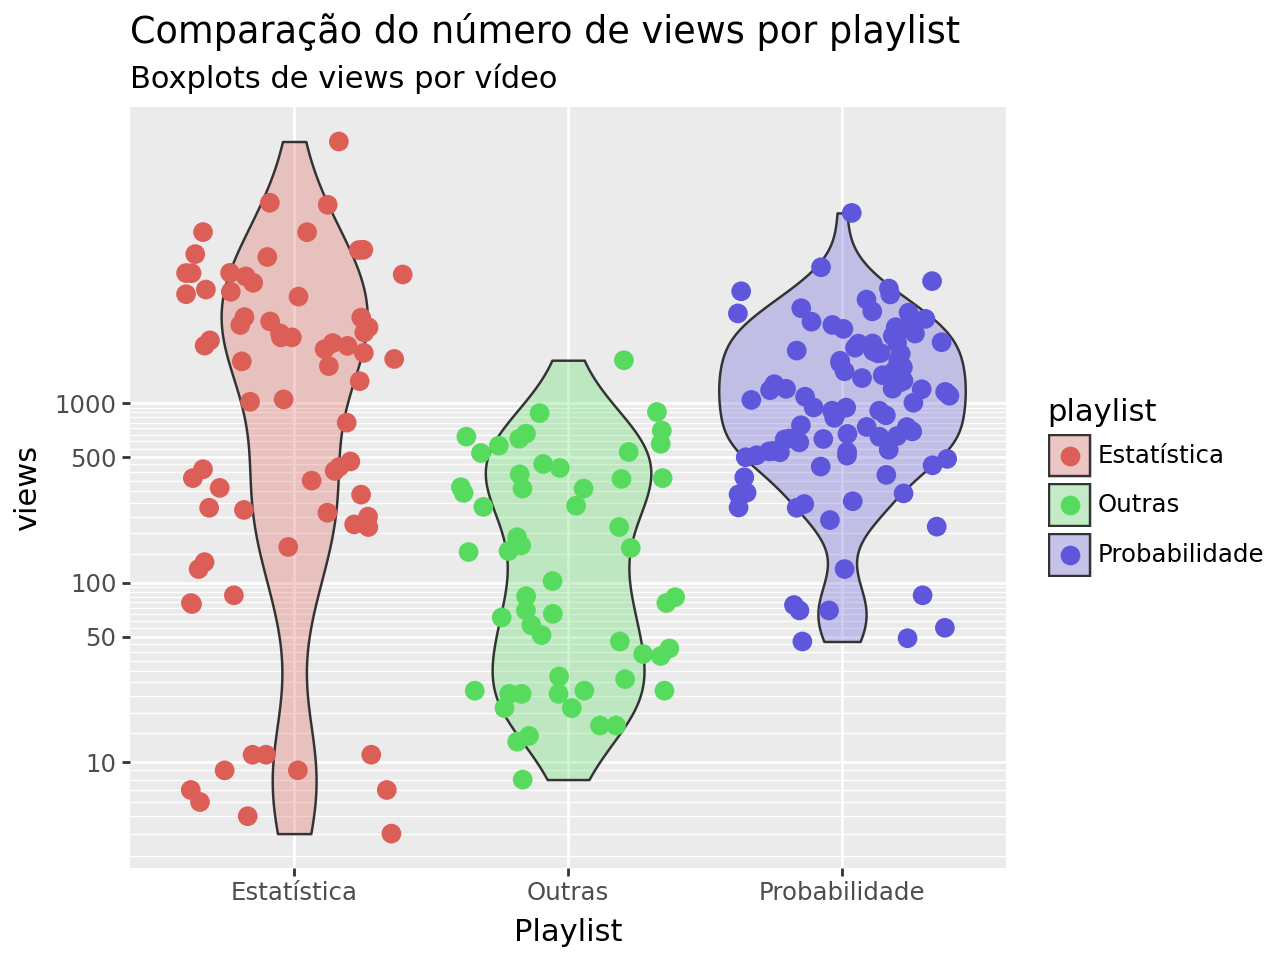

In [86]:
(ggplot(df_filtrado,aes(x='playlist',y='views'))+
 geom_violin(aes(fill='playlist'),alpha=0.3)+
 geom_jitter(aes(colour='playlist'),size=3)+
 scale_y_log10(breaks=[0,1,10,50,100,500,1000])+
 labs(x='Playlist',y='views',title='Comparação do número de views por playlist',subtitle='Boxplots de views por vídeo')
)

c:\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 48'. Pick better value with 'binwidth'.


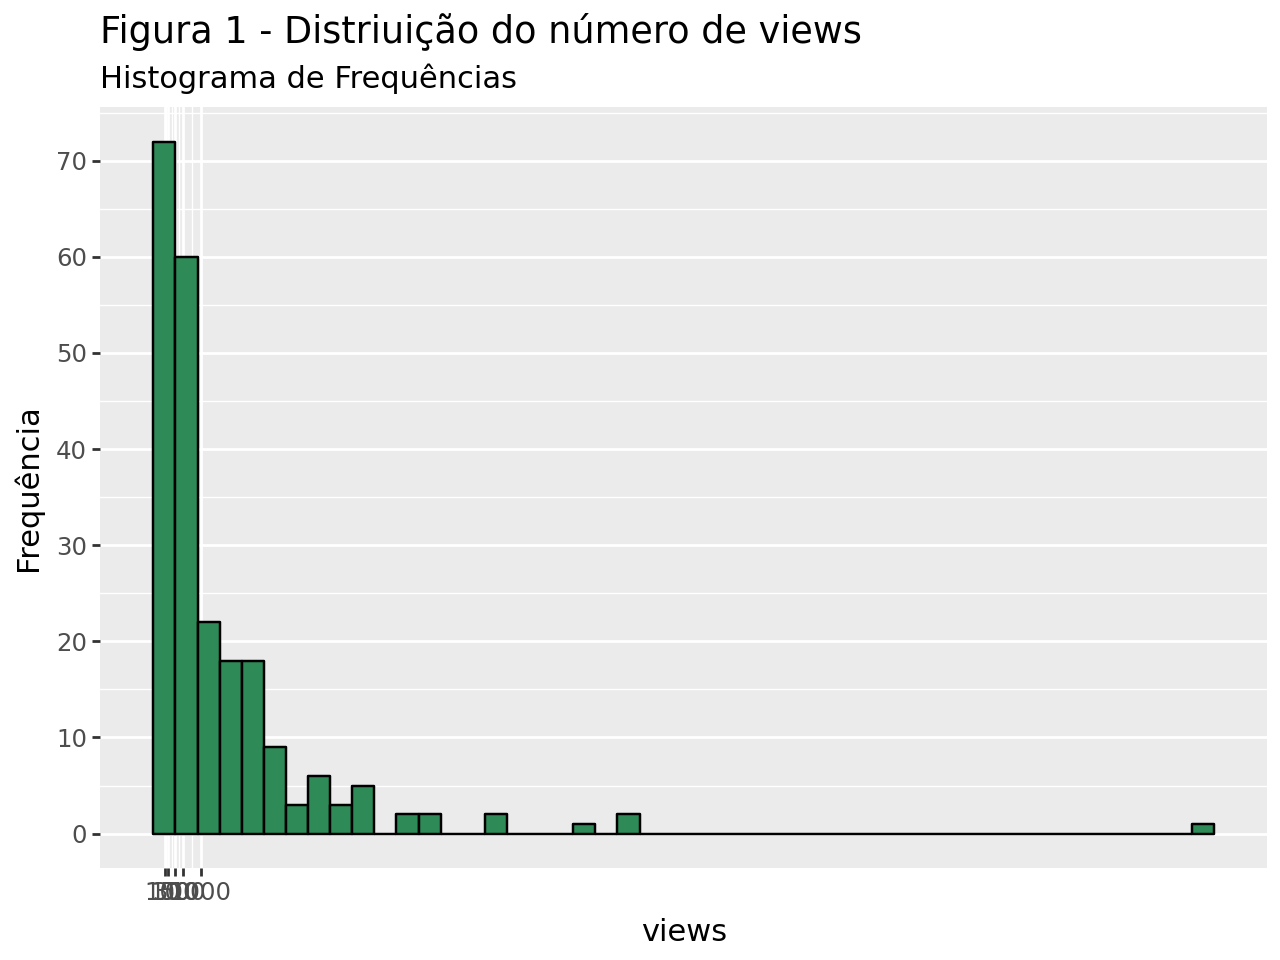

In [87]:
(ggplot(df_filtrado,aes(x='views'))+geom_histogram(fill='seagreen',colour='black')+
 scale_x_continuous(breaks=[10,100,300,500,1000])+
 scale_y_continuous(breaks=[0,10,20,30,40,50,60,70,80])+
 labs(x='views',y='Frequência',title='Figura 1 - Distriuição do número de views',
     subtitle='Histograma de Frequências')
 )

In [88]:
result[['views']].round(0).transpose()

,count,mean,std,min,q1,median,q3,max,amplitude,coeficiente_variacao,desvio_medio
views,226.0,1586.0,2769.0,4.0,185.0,634.0,2025.0,28631.0,28627.0,175.0,1576.0


In [89]:
df_filtrado[df_filtrado['views']>=300]

,titulo,curtidas,inscritos,views,tempo_exibicao_h,playlist
1,Introdução | Estatística Básica 01,1268,860,28631,852.5966,Estatística
2,Resumo de Dados | Estatística Básica 02,858,215,12719,1089.6826,Estatística
3,Representações Gráficas I | Estatística Básica 03,654,115,8952,907.4947,Estatística
4,"Parâmetros, Estimadores e Estimativas | Estatí...",602,177,13047,1089.2803,Estatística
5,Introdução | Curso de Probabilidade 01,584,330,11459,458.3918,Probabilidade
...,...,...,...,...,...,...
172,Resumo de Probabilidade 14 - Variância de uma ...,11,2,855,44.3474,Probabilidade
178,Resumo de Probabilidade 12 - Exercício Esperan...,9,2,635,11.3018,Probabilidade
179,Resumo de Probabilidade 21 - Distribuição de P...,8,0,541,15.6077,Probabilidade
185,Aulão de Probabilidade Parte 2: Fuja do Nabo 0...,7,0,317,65.7326,Probabilidade


In [90]:
result_playlist.round(0)

views                                                    \
              count    mean     std min     q1  median      q3    max   
playlist                                                                
Estatística      71  2787.0  4278.0   4  222.0  1707.0  3978.0  28631   
Outras           56   258.0   317.0   8   30.0   125.0   387.0   1733   
Probabilidade    99  1476.0  1555.0  47  522.0  1041.0  1998.0  11459   

                                                           
              amplitude coeficiente_variacao desvio_medio  
playlist                                                   
Estatística       28627                153.0       2666.0  
Outras             1725                123.0        237.0  
Probabilidade     11412                105.0       1049.0

c:\Python312\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


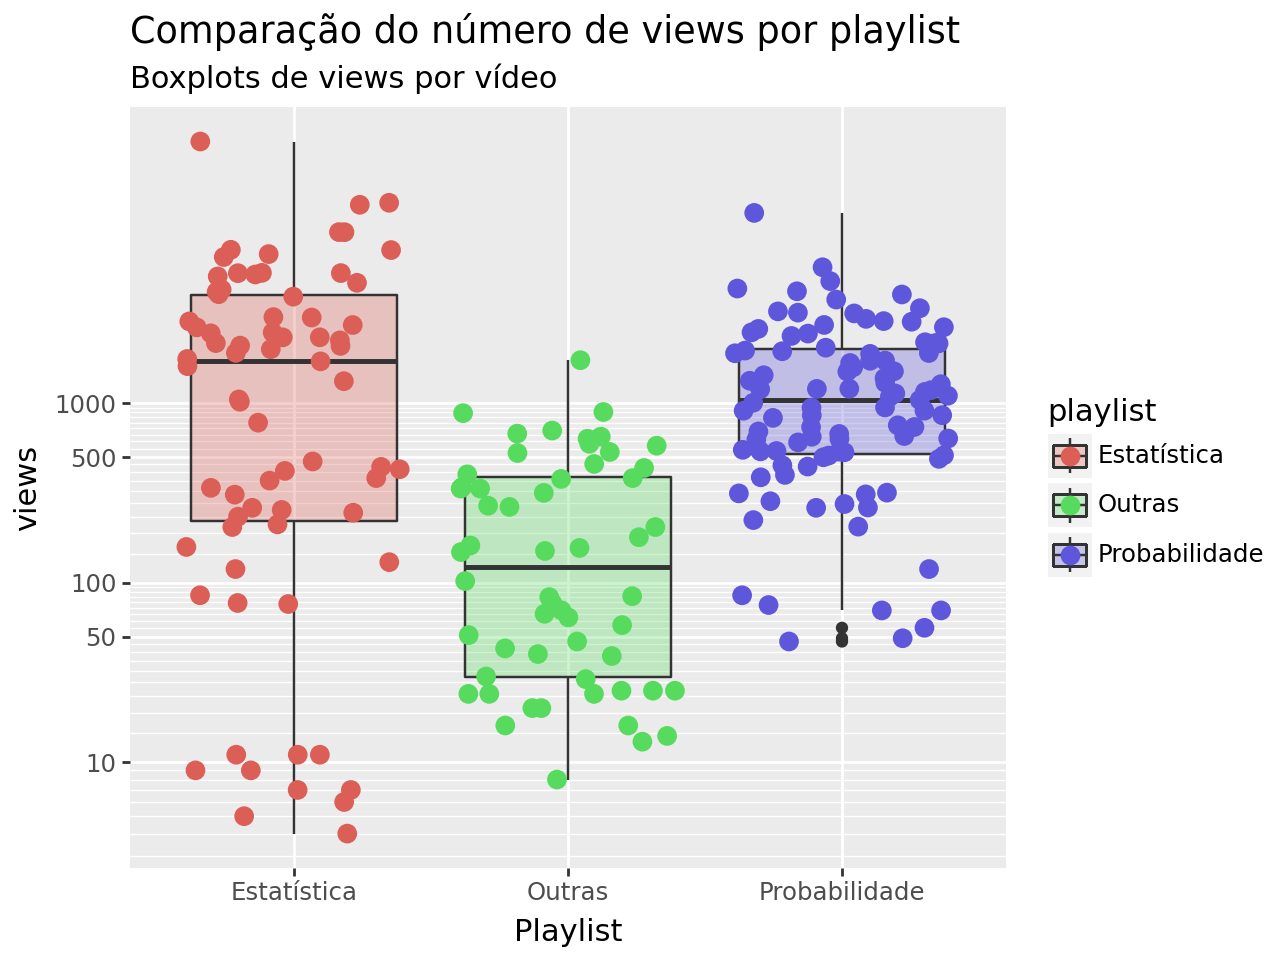

In [91]:
(ggplot(df_filtrado,aes(x='playlist',y='views'))+
 geom_boxplot(aes(fill='playlist'),alpha=0.3)+
 geom_jitter(aes(colour='playlist'),size=3)+
 scale_y_log10(breaks=[0,1,10,50,100,500,1000])+
 labs(x='Playlist',y='views',title='Comparação do número de views por playlist',subtitle='Boxplots de views por vídeo')
)